In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# (1) 创建原始图像
img = cv.imread("Fig1101.png", flags=0)  # 读取灰度图像

In [4]:
# (2) 图像的傅里叶变换
imgFloat = img.astype(np.float32)  # 将图像转换成 float32
dft = cv.dft(imgFloat, flags=cv.DFT_COMPLEX_OUTPUT)  # (512, 512,2)  
dftShift = np.fft.fftshift(dft)  # 将低频分量移到频谱中心

原始图像大小为 (512, 512),但DFT之后有实数部和虚数部，分为两个通道，所以dft的格式为 (512, 512, 2)

In [8]:
# (3) 图像的傅里叶逆变换
iShift = np.fft.ifftshift(dftShift)  # 将低频分量移回四角
# idft = cv.dft(iShift, flags=cv.DFT_INVERSE)  # 傅里叶逆变换
idft = cv.idft(iShift)  # (512, 512,2)
idftAmp = cv.magnitude(idft[:, :, 0], idft[:, :, 1])  # 重建图像
rebuild = np.uint8(cv.normalize(idftAmp, None, 0, 255, cv.NORM_MINMAX))
print("img：{}, dft:{}, idft:{}".format(img.shape, dft.shape, idft.shape))

img：(512, 512), dft:(512, 512, 2), idft:(512, 512, 2)


In [6]:
# (4) 傅里叶频谱的显示
dftAmp = cv.magnitude(dft[:,:,0], dft[:,:,1])  # 幅度谱，未中心化
ampLog = np.log(1 + dftAmp)  # 幅度谱对数变换，以便于显示
shiftDftAmp = cv.magnitude(dftShift[:,:,0], dftShift[:,:,1])  # 幅度谱中心化
shiftAmpLog = np.log(1 + shiftDftAmp)  # 中心化幅度谱对数变换
phase = np.arctan2(dft[:,:,1], dft[:,:,0])  # 相位谱(弧度制)
dftPhi = phase / np.pi * 180  # 转换为角度制 [-180, 180]
print("img min/max：{}, {}".format(imgFloat.min(), imgFloat.max()))
print("dftMag min/max：{:.1f}, {:.1f}".format(dftAmp.min(), dftAmp.max()))
print("dftPhi min/max：{:.1f}, {:.1f}".format(dftPhi.min(), dftPhi.max()))
print("ampLog min/max: {:.1f}, {:.1f}".format(ampLog.min(), ampLog.max()))
print("rebuild min/max：{}, {}".format(rebuild.min(), rebuild.max()))

img min/max：0.0, 252.0
dftMag min/max：52.3, 48426100.0
dftPhi min/max：-180.0, 180.0
ampLog min/max: 4.0, 17.7
rebuild min/max：0, 255


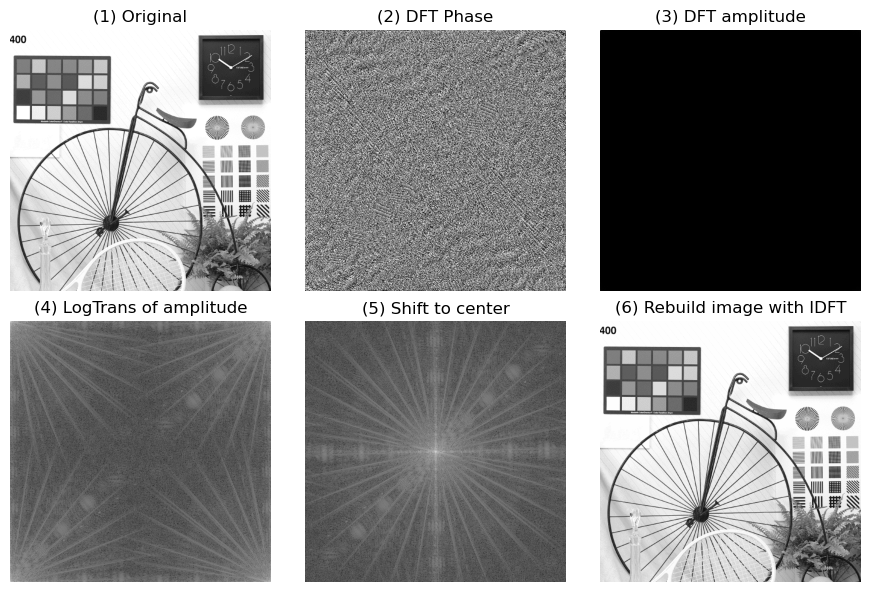

In [7]:
plt.figure(figsize=(9, 6))
plt.subplot(231), plt.title("(1) Original")
plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(232), plt.title("(2) DFT Phase"), plt.axis('off')
plt.imshow(dftPhi, cmap='gray'), plt.axis('off')
plt.subplot(233), plt.title("(3) DFT amplitude")
plt.imshow(dftAmp, cmap='gray'), plt.axis('off')
plt.subplot(234), plt.title("(4) LogTrans of amplitude")
plt.imshow(ampLog, cmap='gray'), plt.axis('off')
plt.subplot(235), plt.title("(5) Shift to center")
plt.imshow(shiftAmpLog, cmap='gray'), plt.axis('off')
plt.subplot(236), plt.title("(6) Rebuild image with IDFT")
plt.imshow(rebuild, cmap='gray'), plt.axis('off')
plt.tight_layout()
plt.show()